<!-- Markdown cells support HTML: I used HTML for format the markdown cells -->

<div style="background-color: #EDF6F9; padding: 10px; color: #3D4F56; font-family: 'Georgia'; border: 2px solid #8E8D8A;">
    <h2>AI Honors Project:</h2>
    <h1>Representation and Analysis of Search Algorithms</h1>
    <h4><i>Hailey Reed -- CSE 4705 Sec 002<i></h4>
</div>


<div style="background-color: #EDF6F9; padding: 10px; color: #3D4F56; font-family: 'Georgia'; border: 2px solid #8E8D8A;">
    <h2>Objective</h2>
    <p>The objective of this project is to create a visual representation and analysis of the five search algorithms from Assignment 2: BFS, DFS, UCS, GBFS, and A* Search. My visualizations will illustrate each algorithm’s traversal path on a graph of Romania, highlighting differences in their approaches and outcomes.</p>
    <p>The project concludes with a summary of my findings and justification for it being considered Honors level work. My summary includes organizing the Jupyter Notebook with Markdown cells, importing images with the Pillow library, and using NetworkX and Matplotlib to display the visual representations.</p>
</div>


<div style="background-color: #EDF6F9; padding: 10px; color: #3D4F56; font-family: 'Georgia'; border: 2px solid #8E8D8A;">
    <h3>( 1 ) Data & Algorithms</h3>
    <p>The first step I took in creating this project was to insert the 5 search algorithms from Assignment 2, functions to initialize and create the map graph, as well as the data provided for the Romania Graph and Heuristic Function.</p>
    <h4><i>The Following 7 Cells are copied directly from Assignment 2 -- Not part of my Findings in this Project:</i></h4>
</div>


<div style="padding: 10px; color: #3D4F56; font-family: 'Georgia';">
    <h3><i>Data:</i></h3>
</div>


In [118]:
# Given Romania Graph
romania_map = {
    'Oradea':{'Zerind':71, 'Sibiu':151},
    'Zerind':{'Oradea':71, 'Arad':75},
    'Arad':{'Zerind':75, 'Sibiu':140, 'Timisoara':118},
    'Timisoara':{'Arad':118, 'Lugoj':111},
    'Lugoj':{'Timisoara':111, 'Mehadia':70},
    'Mehadia':{'Lugoj':70, 'Dobreta':75},
    'Dobreta':{'Mehadia':75, 'Craiova':120},
    'Sibiu':{'Oradea':151, 'Fagaras':99, 'Rimnicu Vilcea':80, 'Arad':140},
    'Rimnicu Vilcea':{'Sibiu':80, 'Pitesti':97, 'Craiova':146},
    'Craiova':{'Rimnicu Vilcea':146, 'Pitesti':138, 'Dobreta':120},
    'Fagaras':{'Sibiu':99, 'Bucharest':211},
    'Pitesti':{'Rimnicu Vilcea':97, 'Bucharest':101, 'Craiova':138},
    'Neamt':{'Iasi':87},
    'Giurgiu':{'Bucharest':90},
    'Bucharest':{'Pitesti':101, 'Fagaras':211, 'Urziceni':85, 'Giurgiu':90},
    'Iasi':{'Neamt':87, 'Vaslui':92},
    'Urziceni':{'Bucharest':85, 'Vaslui':142, 'Hirsova':98},
    'Vaslui':{'Iasi':92, 'Urziceni':142},
    'Hirsova':{'Urziceni':98, 'Eforie':86},
    'Eforie':{'Hirsova':86}
}

# Given Heuristic Function Data (Straight-Line Distances to Bucharest)
sld_to_Bucharest = {'Arad':366,
                    'Bucharest':0,
                    'Craiova':160,
                    'Dobreta':242,
                    'Eforie':161,
                    'Fagaras':176,
                    'Giurgiu':77,
                    'Hirsova':151,
                    'Iasi':226,
                    'Lugoj':244,
                    'Mehadia':241,
                    'Neamt':234,
                    'Oradea':380,
                    'Pitesti':100,
                    'Rimnicu Vilcea':193,
                    'Sibiu':253,
                    'Timisoara':329,
                    'Urziceni':80,
                    'Vaslui':199,
                    'Zerind':374
                   }

<div style="padding: 10px; color: #3D4F56; font-family: 'Georgia';">
    <h3><i>BFS:</i></h3>
</div>


In [119]:
# BFS Function -- following Pseudocode from Lecture
from collections import deque
# our BFS function takes parameters for graph and start node
def bfs(graph, start_node):
    # initialize start with the corresponding node in map_graph
    start = graph[start_node]

    # dictionary of visited nodes -- initially empty
    visited_nodes = {}
    # set up queue -- initially empty
    frontier = deque()

    # start node has no predecessor
    start.predecessor = None
    # add start node to visited nodes -- (no predecessor, 0 distance from start)
    visited_nodes[start.name] = (None, 0)
    # load start node into queue
    frontier.append(start)

    # repeat while queue is not empty
    while frontier:
        # remove the node from the front of queue
        current_node = frontier.popleft()
        # visit each unvisited neighbor        
        for neighbor_node, distance in current_node.unvisited_adjacent_nodes(visited_nodes):
            # maintain a trail -- set predecessor
            neighbor_node.predecessor = current_node
            # does this node represent a goal state?
            if neighbor_node.is_goal_state():
                # if so, we are done -- update total_distance & visited_nodes & return path )
                total_distance = visited_nodes[current_node.name][1] + distance
                visited_nodes[neighbor_node.name] = (current_node.name, total_distance)
                return get_path(start, neighbor_node, visited_nodes, graph)
            # if not goal state, mark neighbor as visited (& update distance)
            total_distance = visited_nodes[current_node.name][1] + distance
            visited_nodes[neighbor_node.name] = (current_node.name, total_distance)
            # load neighbor into queue
            frontier.append(neighbor_node)
    
    # if we made it here, no path to goal found
    return None

<div style="padding: 10px; color: #3D4F56; font-family: 'Georgia';">
    <h3><i>DFS:</i></h3>
</div>


In [120]:
# we use a stack data structure implement the Depth-First Frontier --> this is because stack is LIFO
    # a stack is implemented using a list in python, no need to import

# DFS Function -- following Pseudocode from Lecture

# our DFS function takes parameters for graph and start node
def dfs(graph, start_node):
    # initialize start with the corresponding node in map_graph
    start = graph[start_node]

    # dictionary of visited nodes -- initially empty
    visited_nodes = {}
    # set up stack (using list), initially empty
    stack = []

    # start node has no predecessor
    start.predecessor = None
    # add start node to visited nodes
    visited_nodes[start.name] = (None, 0)
    # push start node onto top of stack
    stack.append(start)

    # while stack is not empty
    while stack:
        # pop node from top of stack
        current_node = stack.pop()
        # visit each unvisited neighbor
        for neighbor_node, distance in current_node.unvisited_adjacent_nodes(visited_nodes):
            # maintain trail (set predecessor)
            neighbor_node.predecessor = current_node
            # does this node represent a goal state?
            if neighbor_node.is_goal_state():
                # if so, we are done -- update variables & return path
                total_distance = visited_nodes[current_node.name][1] + distance
                visited_nodes[neighbor_node.name] = (current_node.name, total_distance)
                return get_path(start, neighbor_node, visited_nodes, graph)
            # if not goal state, mark neighbor as visited, update variables
            total_distance = visited_nodes[current_node.name][1] + distance
            visited_nodes[neighbor_node.name] = (current_node.name, total_distance)
            # push neighbor onto top of stack
            stack.append(neighbor_node)
    # if we made it here, no path to goal fonud
    return None

<div style="padding: 10px; color: #3D4F56; font-family: 'Georgia';">
    <h3><i>UCS:</i></h3>
</div>


In [121]:
# we use a priority queue data structure implement the Uniform Cost search frontier
    # this is because we are now taking edge weights into account, and should prioritize lowest weight

from queue import PriorityQueue

# UCS Function -- following Pseudocode from Lecture

# our UCS function takes parameters for graph and start node
def ucs(graph, start_node):
    # initialize start with the corresponding node in map_graph
    start = graph[start_node]
    # start node has no predecessor
    start.predecessor = None
    # set up priority queue for frontier -- initially empty
    frontier = PriorityQueue()
    # put start node in frontier
    frontier.put((0, start))

    # set up list of explored nodes, initially empty
    explored_nodes = {start.name: (None, 0)}

    # repeat while frontier not empty
    while not frontier.empty():
        # get node from front of frontier (priority queue)
        current_cost, current_node = frontier.get()
        # if current node is goal state, break
            # this step differs from bfs and dfs, as we do not return here since it may not be optimal
        if current_node.is_goal_state():
            break
        # visit each unexplored neighbor
        for neighbor_node, edge_cost in current_node.adjacent.items():
            # update cost
            new_cost = current_cost + edge_cost
            # keep only 1 copy of neighbor node with min path cost
            if neighbor_node.name not in explored_nodes or new_cost < explored_nodes[neighbor_node.name][1]:
                frontier.put((new_cost, neighbor_node))
                explored_nodes[neighbor_node.name] = (current_node.name, new_cost)

    return get_path(start, current_node, explored_nodes, graph)

<div style="padding: 10px; color: #3D4F56; font-family: 'Georgia';">
    <h3><i>GBFS:</i></h3>
</div>


In [122]:
# we use a priority queue data structure implement the Greedy Best First search frontier
from queue import PriorityQueue

# GBFS Function -- following Pseudocode from Lecture

# our GBFS function takes parameters 3 for graph, heuristics, and start node
def gbfs(graph, heuristics, start_node):
    # initialize start with the corresponding node in map_graph
    start = graph[start_node]
    # start node has no predecessor
    start.predecessor = None
    # set up priority queue for frontier -- initially empty
    frontier = PriorityQueue()
    # put start node in frontier
    frontier.put((heuristics[start.name], start))

    # set up list of explored nodes, initially empty
    explored_nodes = {start.name: (None, 0)}
    
    # repeat while frontier not empty
    while not frontier.empty():
        # get node from front of frontier (priority queue)
        _, current_node = frontier.get()
        # is node a goal state?
        if current_node.is_goal_state():
            # if so, we are done -- return path
            return get_path(start, current_node, explored_nodes, graph)
        # visit each unexplored neighbor
        for neighbor_node, edge_cost in current_node.adjacent.items():
            # update cost
            new_cost = explored_nodes[current_node.name][1] + edge_cost
            # keep only 1 copy of neighbor node with min path cost
            if neighbor_node.name not in explored_nodes or new_cost < explored_nodes[neighbor_node.name][1]:
                frontier.put((heuristics[neighbor_node.name], neighbor_node))
                explored_nodes[neighbor_node.name] = (current_node.name, new_cost)
    # if we made it here, no path to goal found
    return None

<div style="padding: 10px; color: #3D4F56; font-family: 'Georgia';">
    <h3><i>A*:</i></h3>
</div>


In [123]:
# we use a priority queue data structure implement the A* search frontier
from queue import PriorityQueue

# A* Function -- following Pseudocode from Lecture

# our A* function takes parameters 3 for graph, heuristics, and start node
def A_star(graph, heuristics, start_node):
    # initialize start with the corresponding node in map_graph
    start = graph[start_node]
    # start node has no predecessor
    start.predecessor = None
    # set up priority queue for frontier -- initially empty
    frontier = PriorityQueue()
    # put start node in frontier
    frontier.put((heuristics[start.name], start))

    # set up list of explored nodes, initially empty
    explored_nodes = {start.name: (None, 0)}
    
    # repeat while frontier not empty
    while not frontier.empty():
        # get node from front of frontier (priority queue)
        _, current_node = frontier.get()
        # is node a goal state?
        if current_node.is_goal_state():
            # if so, we are done -- return path
            return get_path(start, current_node, explored_nodes, graph)
        # visit each unexplored neighbor
        for neighbor, edge_cost in current_node.adjacent.items():
            # maintain trail
            neighbor_name = neighbor.name
            neighbor_node = graph[neighbor_name] 
            new_cost = explored_nodes[current_node.name][1] + edge_cost
            # keep only 1 copy of neighbor node with min f(n)
            if neighbor_name not in explored_nodes or new_cost < explored_nodes[neighbor_name][1]:
                # update current node & cost
                neighbor_node.predecessor = current_node
                neighbor_node.cost = new_cost
                total_cost = new_cost + heuristics[neighbor_name]
                frontier.put((total_cost, neighbor_node))
                explored_nodes[neighbor_name] = (current_node.name, new_cost)

    # if we made it here, no path to goal found
    return None

<div style="padding: 10px; color: #3D4F56; font-family: 'Georgia';">
    <h3><i>Node class, Function to Create Graph, Function to get Path:</i></h3>
</div>


In [143]:
# import Node class from origional assignment in order to maintain traversal path output from origional assignment

class Node:
    def __init__(self, name):
        # initialize attributes
        self.name = name
        self.predecessor = None
        self.adjacent = {}

    # initialize methods
    # the edge weights between nodes represent the distances between cities
    def add_edge(self, neighbor, distance):
        self.adjacent[neighbor] = distance
    # used to explore adjacent nodes -- visitation
    def unvisited_adjacent_nodes(self, visited_nodes):
        return [(node, dist) for node, dist in self.adjacent.items() if node.name not in visited_nodes]
    # tests to see if we have reached goal state, Bucharest
    def is_goal_state(self):
        return self.name == 'Bucharest'

# in this function, we take the adjacency list for map of romania and initialize
  # each city as a node with a corresponding distance as an edge weight
def create_graph(graph):

    # for each city in graph, store instance of that city in dictionary cities
    map_graph = {name: Node(name) for name in graph}

    # for each edge (distance between cities in graph), store edge weight 
    for node_name, neighbors in graph.items():
        node = map_graph[node_name]
        for neighbor_name, distance in neighbors.items():
            node.add_edge(map_graph[neighbor_name], distance)

    return map_graph

# in this function we backtrack from Bucharest to the start_node using the predecessor attribute
    # in order to establish the path taken, as well as track total cost
def get_path(start_node, goal_node, visited_nodes, nodes):
    # these are used in the written output
    path = []
    total_cost = []
    # these are formatted to be passed through the visualize function
    bfs_path = []
    bfs_edges = []
    current_node = goal_node
    # for each node in the path, add its name & distance to the path and distance to total cost
    while current_node:
        predecessor_name, distance = visited_nodes[current_node.name]
        if predecessor_name:
            # update path and cost
            path.append(f"{predecessor_name} --> {current_node.name} ({distance - visited_nodes[predecessor_name][1]} km)")
            total_cost.append(distance - visited_nodes[predecessor_name][1])
            # update bfs_path and bfs_edges
            bfs_path.append(current_node.name)
            bfs_edges.append((predecessor_name, current_node.name))
        current_node = nodes.get(predecessor_name, None)
    # since we gathered our path from Bucharest to Arad, we must reverse the output to show proper traversal
    bfs_path.append(start_node.name)
    path.reverse()
    bfs_path.reverse()
    bfs_edges.reverse()
    return path, total_cost, bfs_path, bfs_edges

<div style="background-color: #EDF6F9; padding: 10px; color: #3D4F56; font-family: 'Georgia'; border: 2px solid #8E8D8A;">
    <h3>( 2 ) Creating Visual</h3>
    <p>In order to create a visual representation for the traversals, I first had to select an image to use as the backround of my graph. </p>
        <p>The Image I selected is licensed under the Creative Commons Attribution, so I am free to 'remix' the image for this project without copyright issues.</p>
</div>


<div style="padding: 10px; color: #3D4F56; font-family: 'Georgia';">
    <h3><i>Import Libraries:</i></h3>
</div>


In [144]:
import networkx as nx
import matplotlib.pyplot as plt
from PIL import Image
import time

<div style="padding: 10px; color: #3D4F56; font-family: 'Georgia';">
    <h3><i>Determine Node Positions:</i></h3>
    <p>In order to have the backround image correspond to the nodes in my graph, I had to estimate coordinates on the map for each city. </p>
        <p>To do this, I first layed a simple grid over the map. Then, I used google maps to determine about where each city should lie on the graph. I used the grid to determine coordinates for my node positions, which are stored below in 'positions'</p>
</div>


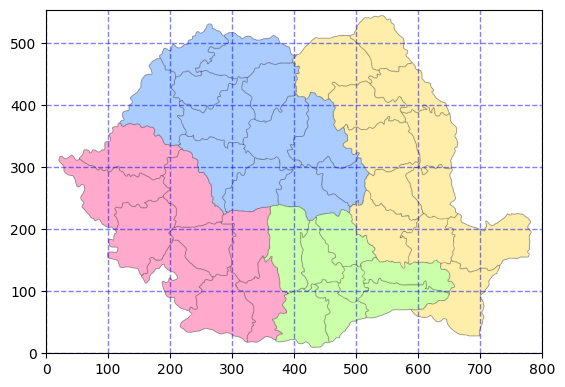

In [145]:
# following syntax from Pillow website, cited at the end of project

# open the image using the path
img = Image.open(r"C:\Users\haile\Desktop\4705\Honors Project\Romania.png")

# syntax to display the image (colored map)
plt.imshow(img)
#plt.axis('on')

# set limits to fit image
plt.xlim(0, img.width)
plt.ylim(img.height, 0)

# my image was kind of fitting weird, so I adjusted the coordinates to match
y_ticks = [554, 454, 354, 254, 154, 54]
y_tick_labels = [0, 100, 200, 300, 400, 500]

# the y axis would typically be displayed with 0 at the top and 550 at the origin, but since I am using it as a grid I need to flip it so origin (0,0)
plt.yticks(ticks=y_ticks, labels=y_tick_labels)

# i added a grid so I could see what I was doing <3
plt.grid(color='blue', linestyle='--', linewidth=1, alpha=0.5)
plt.show()


<div style="padding: 10px; color: #3D4F56; font-family: 'Georgia';">
    <h4><i>Node Positions:</i></h4>
</div>


In [146]:
# positions derived from comparing the gridded map to google maps
positions = {
    'Oradea': (160, 440),
    'Zerind': (140, 380),
    'Arad': (100, 340),
    'Timisoara': (90, 280),
    'Lugoj': (160, 260),
    'Mehadia': (180, 200),
    'Dobreta': (200, 130),
    'Sibiu': (330, 295),
    'Rimnicu Vilcea': (330, 210),
    'Craiova': (300, 100),
    'Fagaras': (420, 265),
    'Pitesti': (390, 180),
    'Bucharest': (490, 120),
    'Neamt': (510, 430),
    'Giurgiu': (475, 40),
    'Iasi': (610, 450),
    'Vaslui': (630, 370),
    'Urziceni': (560, 150),
    'Hirsova': (660, 140),
    'Eforie': (700, 50)
}

<div style="padding: 10px; color: #3D4F56; font-family: 'Georgia';">
    <h3><i>Initialize Visual (Graph + Image):</i></h3>
    <p>In the following code, I initialize the graph for the map of romania using the data from Romania Map (cities and edges) as well as the positions derived above.</p>
    <p>Then, I create a function to display the nodes for the output (visualize_map), as well as a function to visualize the traversals (visualize_traversal)</p>
    <p><i>visualize_map()<i>: This function simply formats the nodes on a graph displayed over the image. The nodes are positioned according to the coordinates derived from the gridded map above. The output of this function is show in the cell below.</p>
        <p><i>visualize_traversal()<i>: This function works similarly to the one above, as it arranges the nodes in the same format. But, this function will highlight each step edge in the traversal path in a new image output. This output uses a timer at each step to indicate the different steps in the traversal.</p>
</div>


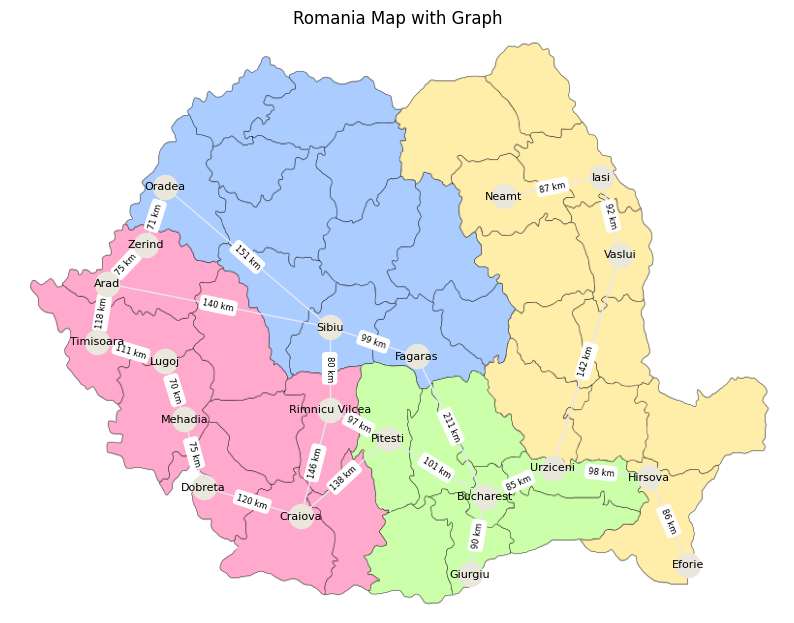

In [166]:
# created a class for Romania Map: I utilize OOP to encapsulate the data and methods for Romania map
class RomaniaMap:
    # initilize Romania map & graph according to derived position & backround image
    def __init__(self, map_data, positions, img_path):
        self.map_data = map_data
        self.positions = positions
        self.img_path = img_path
        self.graph = nx.Graph()
        self.img = Image.open(self.img_path)

        # create the graph (nodes and edges)
        for city, neighbors in self.map_data.items():
            for neighbor, distance in neighbors.items():
                self.graph.add_edge(city, neighbor, weight=distance)

    # create function to display nodes (at positions) and edges (with weights) on map
    # this function displays a still image of the map, and is only used in the output of this cell
    def visualize_map(self):
        # use of Matplot lib to plot the graph, cited below
        # set up dimensions for GRAPH, match it to image
        plt.figure(figsize=(10, 8))
        plt.imshow(self.img, extent=[0, 800, 0, 600])

        # use of Networkx to format the nodes and edges
        # format NODES and edges
        nx.draw(self.graph, pos=self.positions, with_labels=True, node_size=300, node_color='#EAE7DC', font_size=8, font_color='black', edge_color='lavender')
        # add edge weight labels (distances)
        nx.draw_networkx_edge_labels(self.graph, pos=self.positions, edge_labels={(u, v): f'{d["weight"]} km' for u, v, d in self.graph.edges(data=True)}, font_size = 6)

    # this function displays the same output, but in stages according to the step
    # this allows the user to see the traversal path itself
    def visualize_traversal(self, traversal_path, traversal_edges, algorithm_name, delay=1):
        # the weights of the edge labels (we initialized distance as weight above)
        edge_labels = nx.get_edge_attributes(self.graph, 'weight')
        
        # initialize image (size it accordingly)
        plt.figure(figsize=(10, 8))
        plt.imshow(self.img, extent=[0, 800, 0, 600])
        
        # because this function shows the output for each traversal step, we must iterate the path
        # we will use this loop to iterate all but the final path (final will have bolded output)
        for i in range(len(traversal_path) - 1):
            # for each step, clear the graph and create a new one that traverses up to curr step
            # this follows the same initialization process as in visualize_image, just for each step
            plt.clf()
            plt.figure(figsize=(10, 8))
            plt.imshow(self.img, extent=[0, 800, 0, 600])
            nx.draw(self.graph, pos=self.positions, with_labels=True, node_size=300, node_color='#EAE7DC', font_size=8, font_color='black', edge_color='lavender')
            nx.draw_networkx_edge_labels(self.graph, pos=self.positions, edge_labels=edge_labels, font_size=6)
            for j in range(i + 1):
                current_node = traversal_path[j]
                if j < len(traversal_edges):
                    current_edge = traversal_edges[j]
                    nx.draw_networkx_edges(self.graph, pos=self.positions, edgelist=[current_edge], edge_color='black', width=3)
                nx.draw_networkx_nodes(self.graph, pos=self.positions, nodelist=[current_node], node_color='lavender', node_size=600)
            plt.xlim(0, 800)
            plt.ylim(0, 600)
            # for each step, we can title the graph to show which step we are on
            plt.title(f'{algorithm_name} traversal: Step {i + 1}')
            plt.draw()
            plt.pause(delay)

        # create final image outside of the loop to differentiate final traversal
        # i made the font and edge lines green to emphasize that it is the completed traversal
        plt.clf()
        plt.figure(figsize=(10, 8))
        plt.imshow(self.img, extent=[0, 800, 0, 600])

        # same process as above
        nx.draw(self.graph, pos=self.positions, with_labels=True, node_size=400, node_color='#EAE7DC', font_size=8, edge_color='lavender')
        nx.draw_networkx_edge_labels(self.graph, pos=self.positions, edge_labels=edge_labels)

        # this is where we can overlay the green font & edges
        for j in range(len(traversal_path)):
            current_node = traversal_path[j]
            if j < len(traversal_edges):
                current_edge = traversal_edges[j]
                nx.draw_networkx_edges(self.graph, pos=self.positions, edgelist=[current_edge], edge_color='green', width=5)
            nx.draw_networkx_nodes(self.graph, pos=self.positions, nodelist=[current_node], node_color='lavender', node_size=600)
            nx.draw_networkx_labels(self.graph, pos=self.positions, labels={current_node: current_node}, font_size=8,font_color='green')


        plt.title(f'{algorithm_name} Traversal Complete')
        plt.xlim(0, 800)
        plt.ylim(0, 600)
        plt.show()


# initialize and run the visualize_map function so that we can see the map we are working with
romania = RomaniaMap(romania_map, positions, r"C:\Users\haile\Desktop\4705\Honors Project\Romania.png")
romania.visualize_map()
plt.title('Romania Map with Graph')
plt.show()


<div style="background-color: #EDF6F9; padding: 10px; color: #3D4F56; font-family: 'Georgia'; border: 2px solid #8E8D8A;">
    <h3>( 3 ) Run Visualizer on each Algorithm</h3>
    <p>In the following block of code, I run the visualize_traversal() function on each of the 5 search algorithms to give a visual representation of their corresponding paths.</p>
</div>

<div style="padding: 10px; color: #3D4F56; font-family: 'Georgia';">
    <h3><i>Function to Run Algorithm:</i></h3>
</div>


In [167]:
def runAlgorithm(algorithm, name):
    # create an instance of the map of Romania using create_graph function and given adjacency list
    Romania = create_graph(romania_map)

    # initialize start node, Arad
    start = 'Arad'

    # run bfs & dfs (no heuristics input) function on the map/graph of romania and starting node Arad
    if algorithm in [bfs, dfs, ucs]:
        path, total_cost, alg_path, alg_edges = algorithm(Romania, start)
    else:
        path, total_cost, alg_path, alg_edges = algorithm(Romania, sld_to_Bucharest, start)

    # assuming you can change the input and there is the possibility of no path
    # print the path if it exists
    if path:
        path_str = '\n\t'.join(path)
        print(f"Path from {start} to Bucharest using {name}:\n\t{path_str}")
        print(f"Total Distance: {sum(total_cost)} km")
        print(f"Total Cost (Steps): {len(total_cost)} steps")
    # if path doesnt exist
    else:
        print(f"No path found from {start} to Bucharest.")

    # initialize the map & run the visualizer
    romania = RomaniaMap(romania_map, positions, r"C:\Users\haile\Desktop\4705\Honors Project\Romania.png")
    romania.visualize_traversal(alg_path, alg_edges, name, delay=1)

<div style="padding: 10px; color: #3D4F56; font-family: 'Georgia';">
    <h3><i>BFS Output:</i></h3>
</div>


Path from Arad to Bucharest using Breadth First Search:
	Arad --> Sibiu (140 km)
	Sibiu --> Fagaras (99 km)
	Fagaras --> Bucharest (211 km)
Total Distance: 450 km
Total Cost (Steps): 3 steps


<Figure size 1000x800 with 0 Axes>

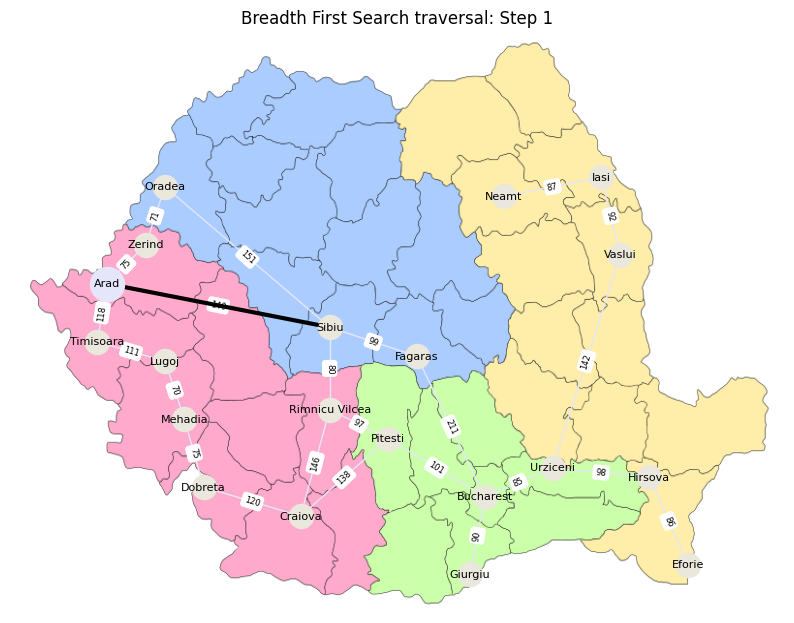

<Figure size 640x480 with 0 Axes>

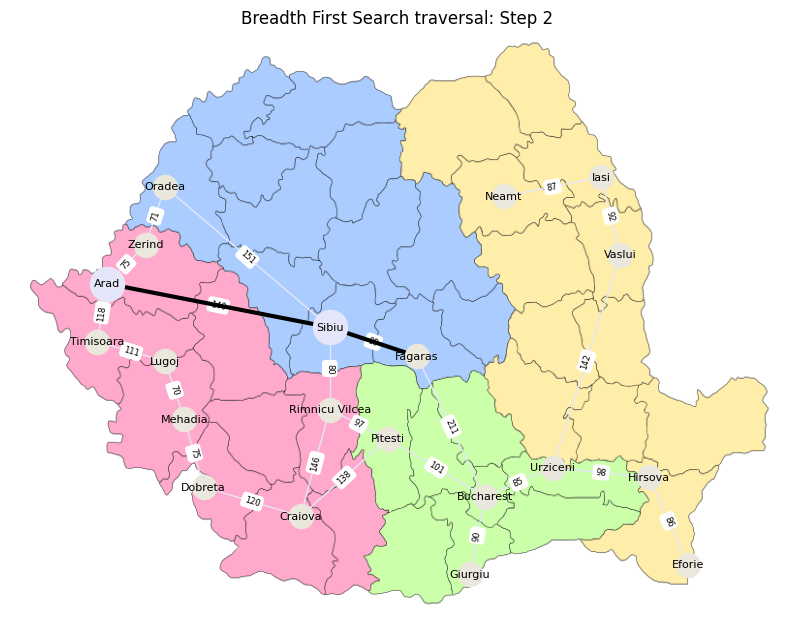

<Figure size 640x480 with 0 Axes>

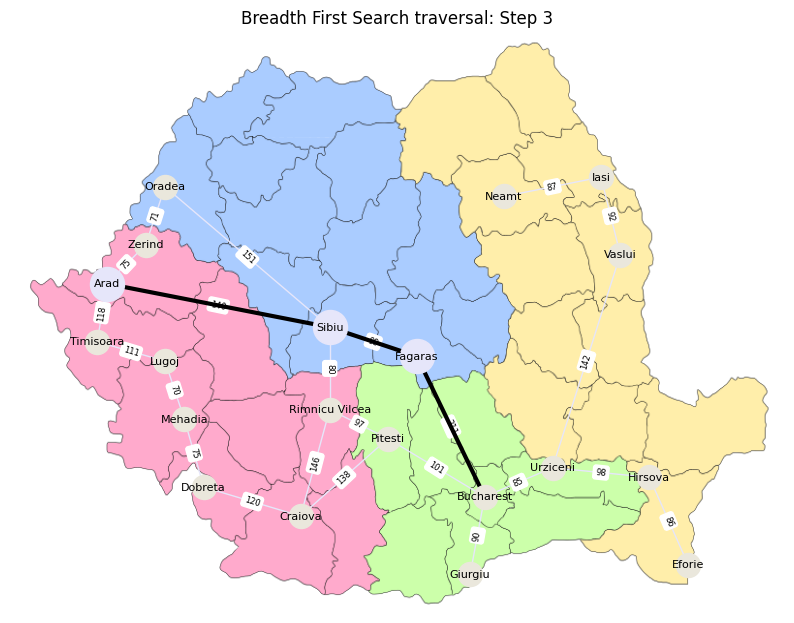

<Figure size 640x480 with 0 Axes>

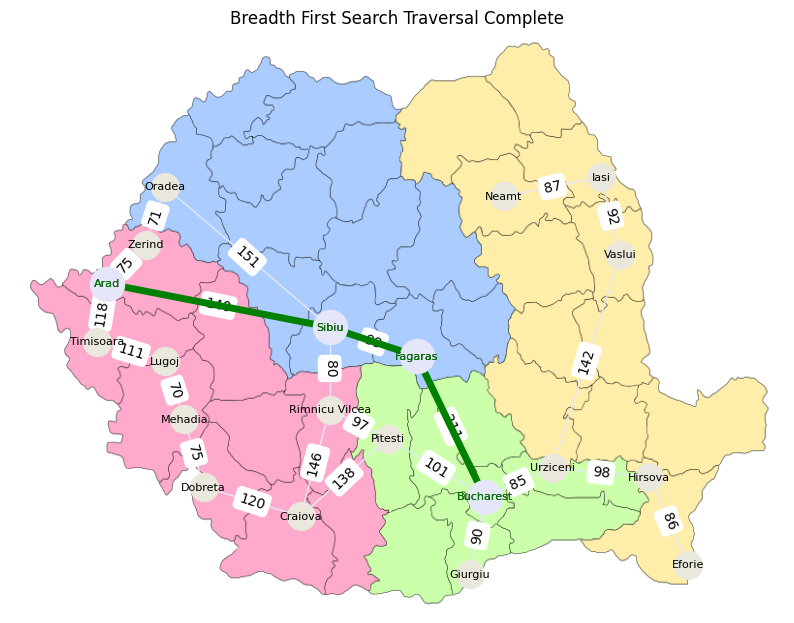

In [168]:
runAlgorithm(bfs, "Breadth First Search")

<div style="padding: 10px; color: #3D4F56; font-family: 'Georgia';">
    <h3><i>DFS Output:</i></h3>
</div>


Path from Arad to Bucharest using Depth First Search:
	Arad --> Timisoara (118 km)
	Timisoara --> Lugoj (111 km)
	Lugoj --> Mehadia (70 km)
	Mehadia --> Dobreta (75 km)
	Dobreta --> Craiova (120 km)
	Craiova --> Pitesti (138 km)
	Pitesti --> Bucharest (101 km)
Total Distance: 733 km
Total Cost (Steps): 7 steps


<Figure size 1000x800 with 0 Axes>

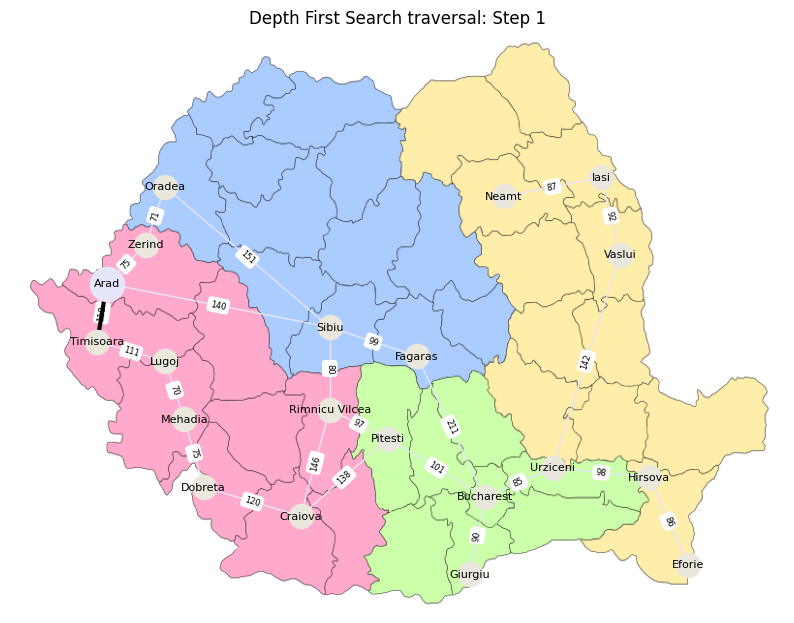

<Figure size 640x480 with 0 Axes>

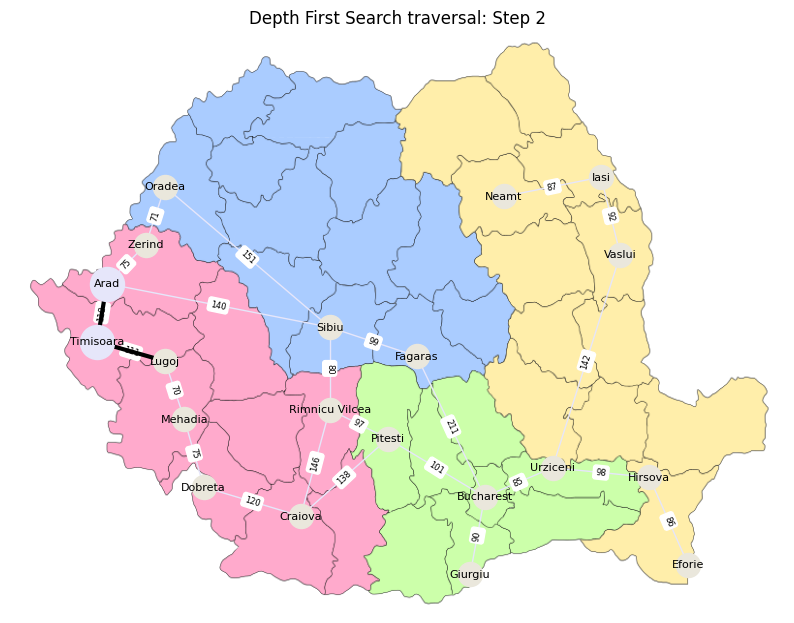

<Figure size 640x480 with 0 Axes>

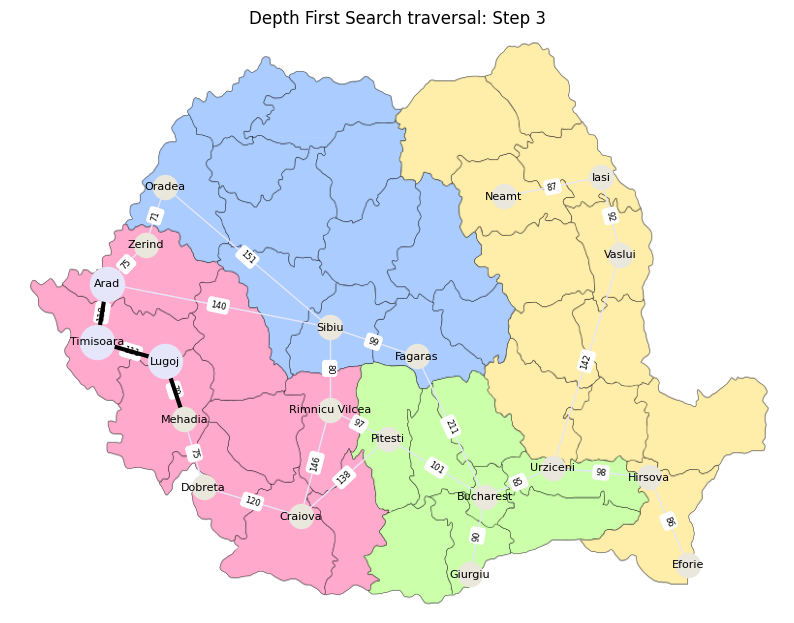

<Figure size 640x480 with 0 Axes>

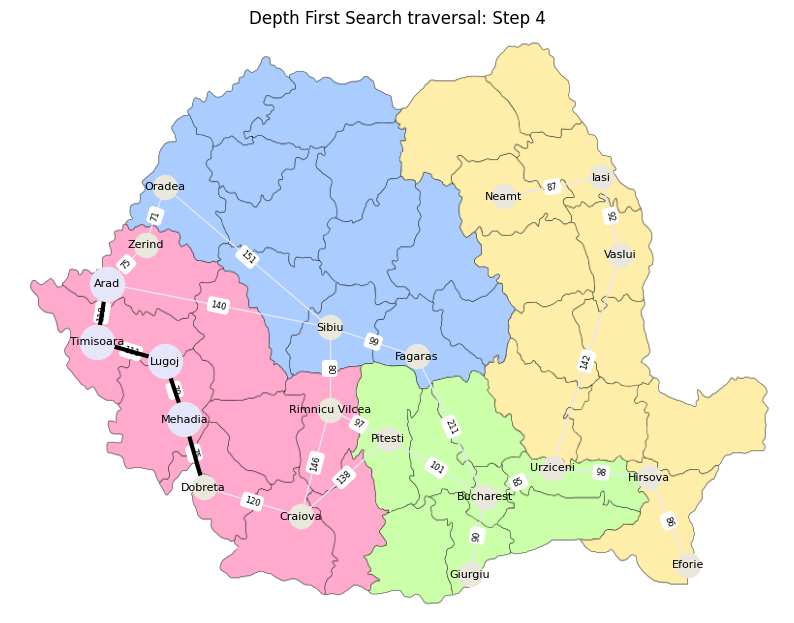

<Figure size 640x480 with 0 Axes>

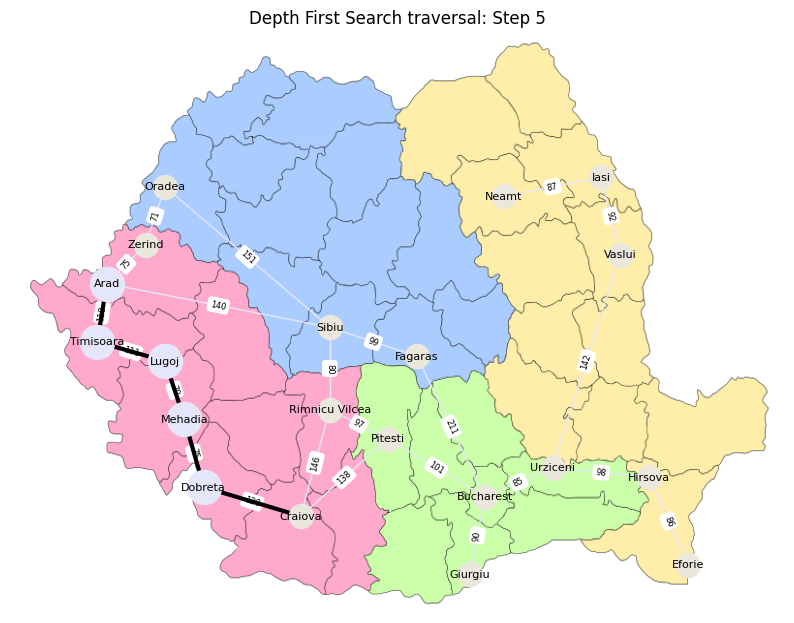

<Figure size 640x480 with 0 Axes>

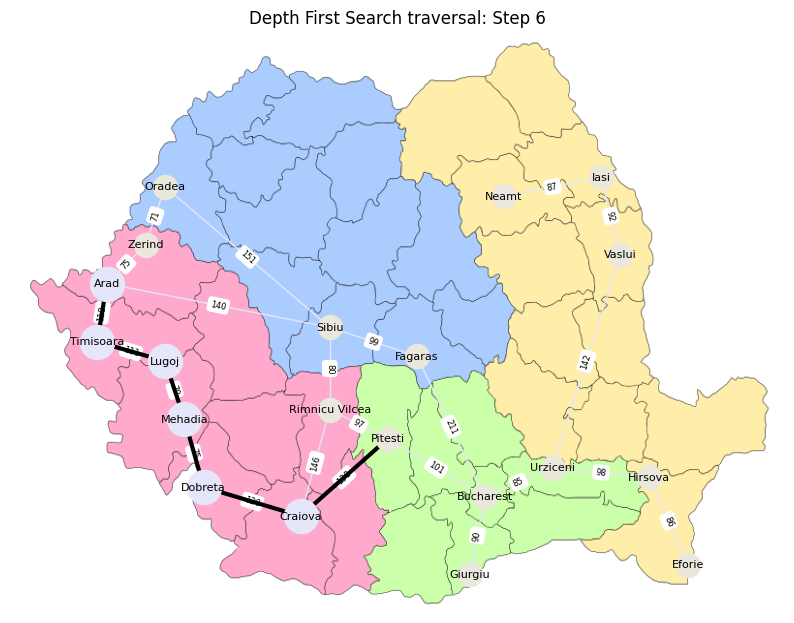

<Figure size 640x480 with 0 Axes>

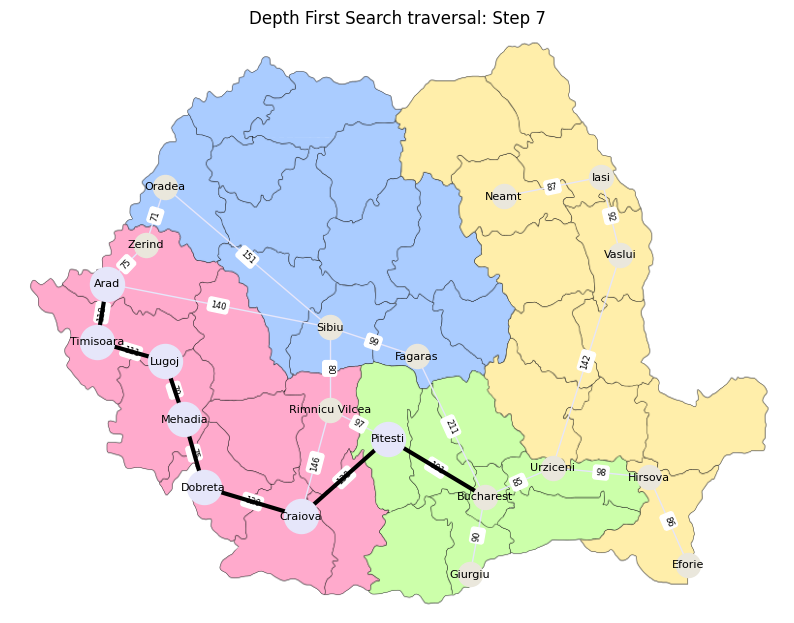

<Figure size 640x480 with 0 Axes>

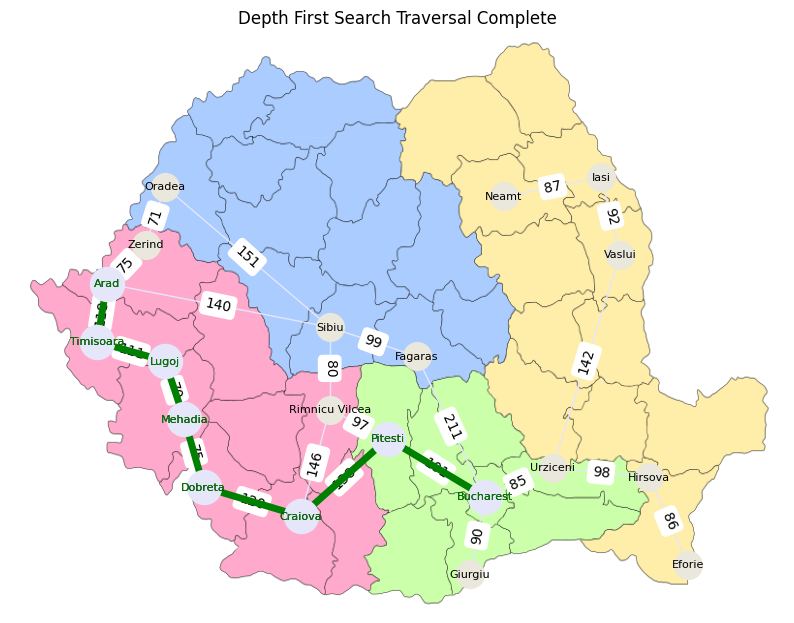

In [169]:
runAlgorithm(dfs, "Depth First Search")

<div style="padding: 10px; color: #3D4F56; font-family: 'Georgia';">
    <h3><i>UCS Output:</i></h3>
</div>


Path from Arad to Bucharest using Uniform Cost Search:
	Arad --> Sibiu (140 km)
	Sibiu --> Rimnicu Vilcea (80 km)
	Rimnicu Vilcea --> Pitesti (97 km)
	Pitesti --> Bucharest (101 km)
Total Distance: 418 km
Total Cost (Steps): 4 steps


<Figure size 1000x800 with 0 Axes>

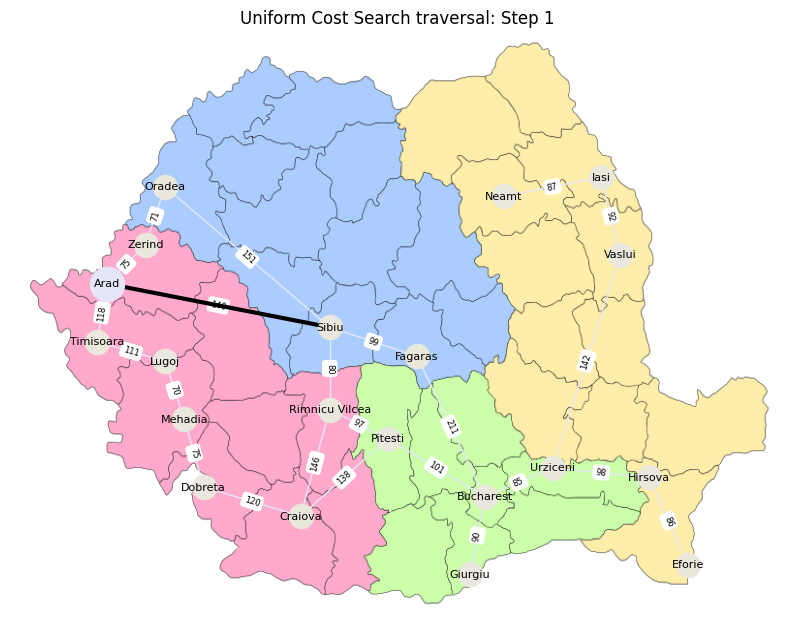

<Figure size 640x480 with 0 Axes>

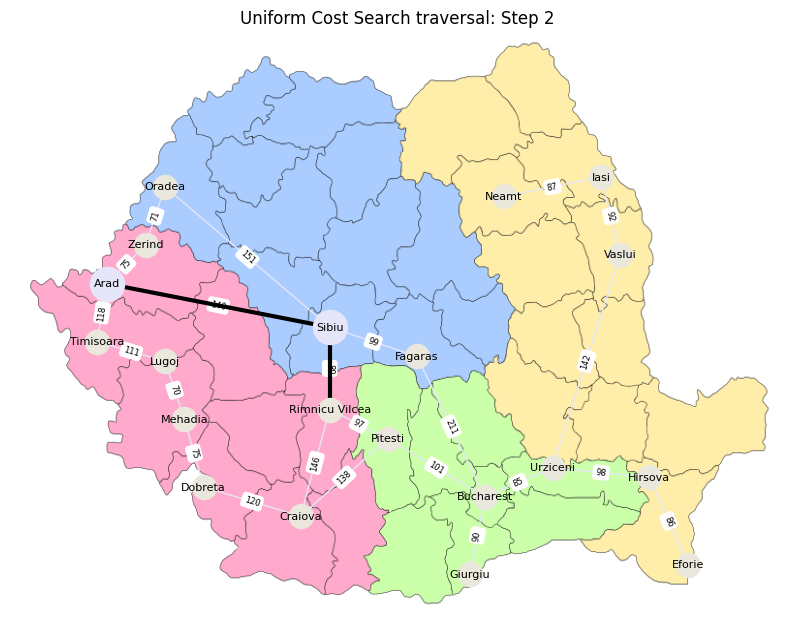

<Figure size 640x480 with 0 Axes>

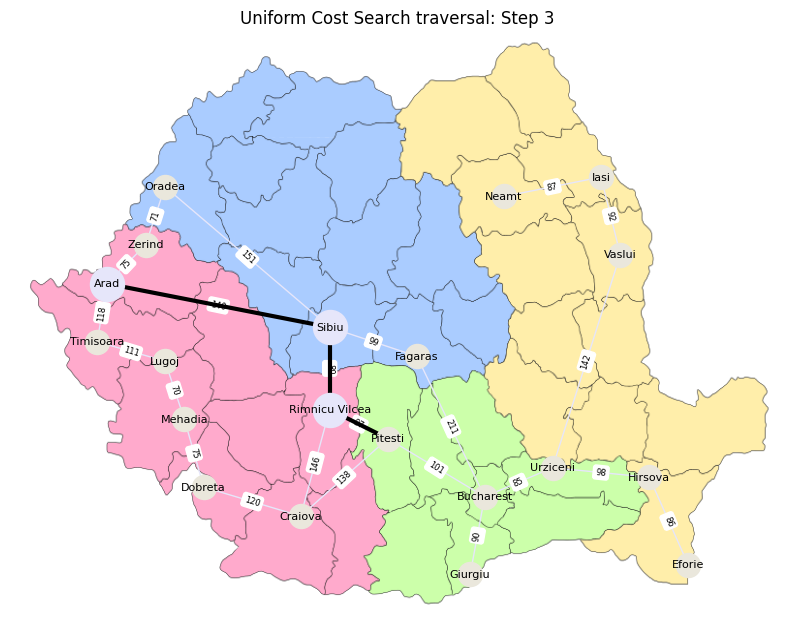

<Figure size 640x480 with 0 Axes>

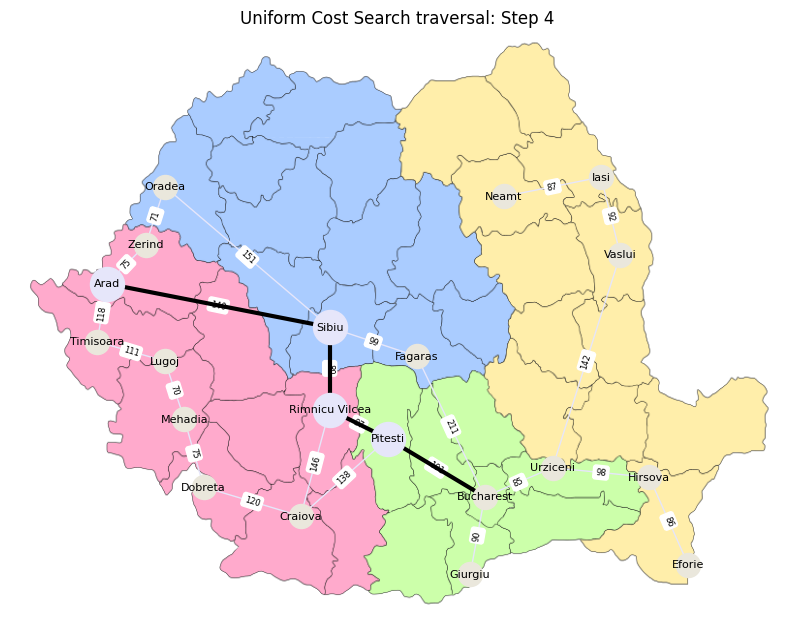

<Figure size 640x480 with 0 Axes>

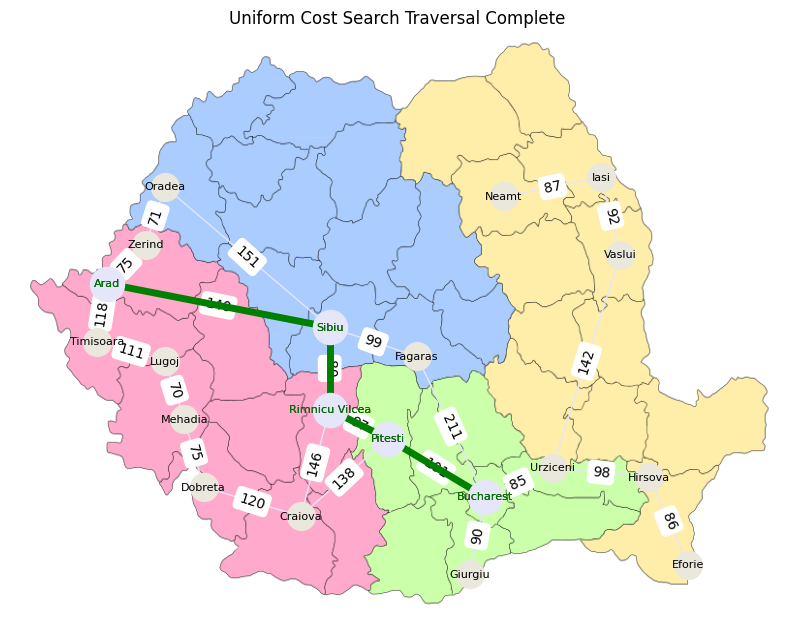

In [170]:
runAlgorithm(ucs, "Uniform Cost Search")

<div style="padding: 10px; color: #3D4F56; font-family: 'Georgia';">
    <h3><i>GBFS Output:</i></h3>
</div>


Path from Arad to Bucharest using Greedy Best First Search:
	Arad --> Sibiu (140 km)
	Sibiu --> Fagaras (99 km)
	Fagaras --> Bucharest (211 km)
Total Distance: 450 km
Total Cost (Steps): 3 steps


<Figure size 1000x800 with 0 Axes>

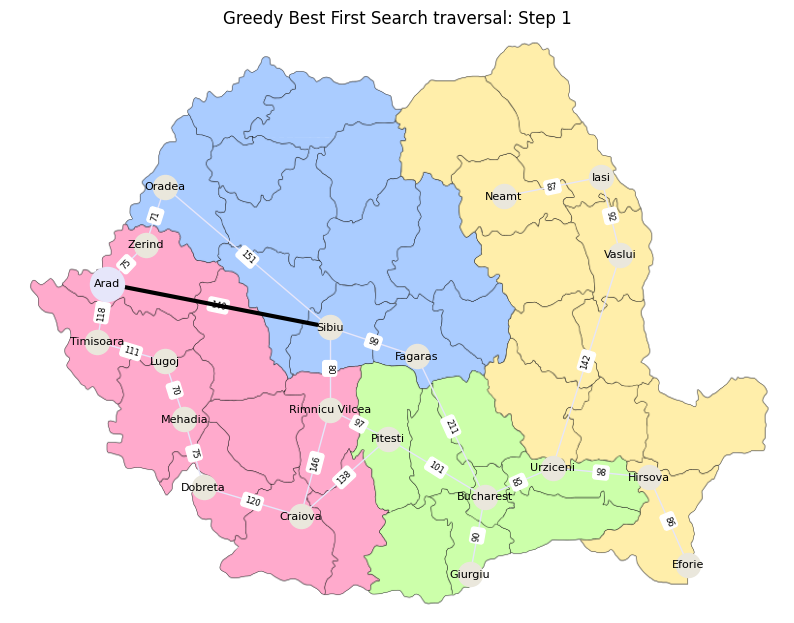

<Figure size 640x480 with 0 Axes>

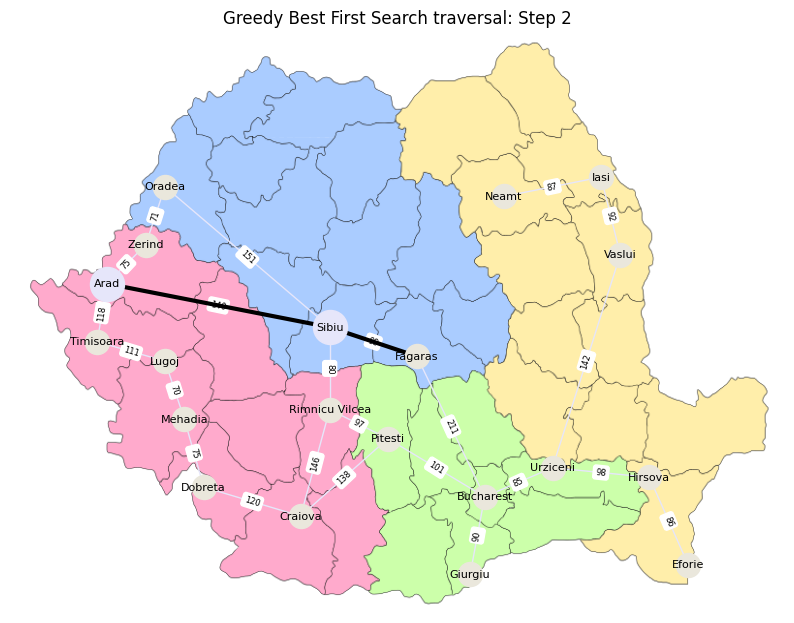

<Figure size 640x480 with 0 Axes>

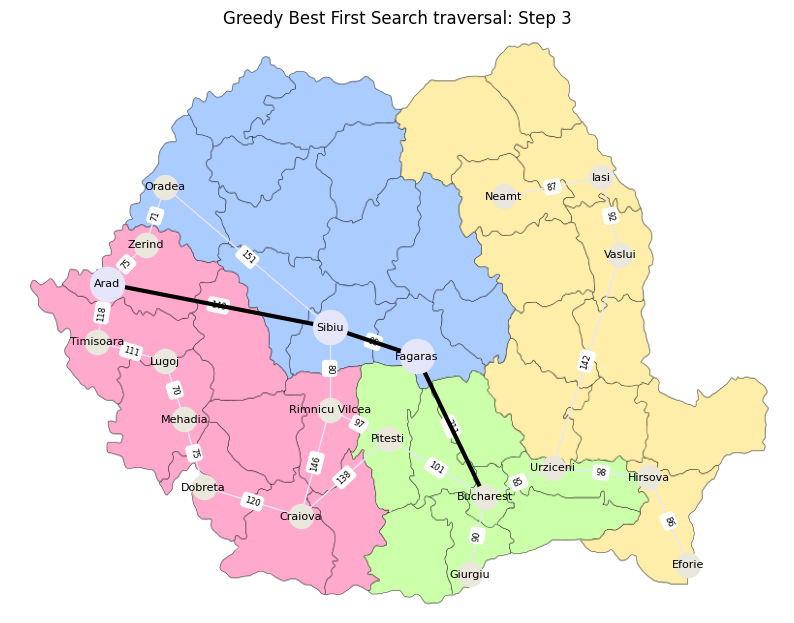

<Figure size 640x480 with 0 Axes>

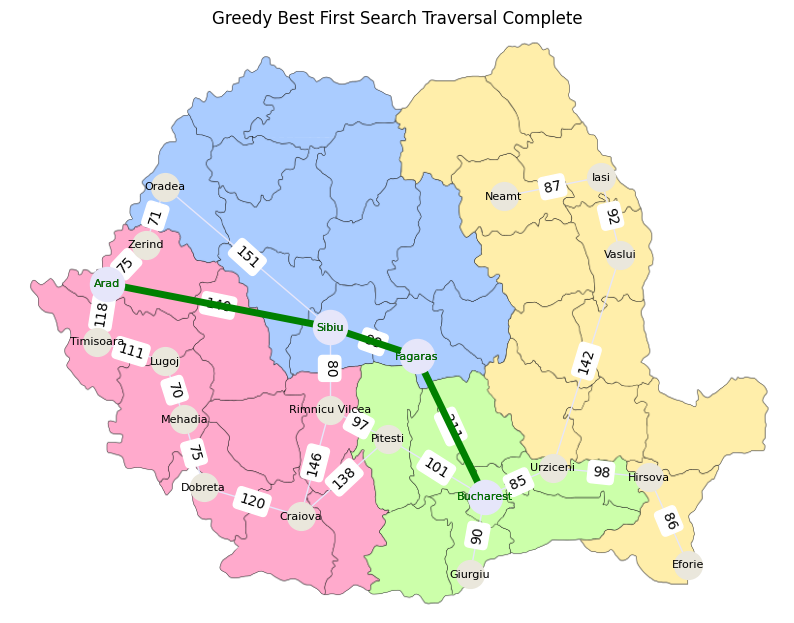

In [171]:
runAlgorithm(gbfs, "Greedy Best First Search")

<div style="padding: 10px; color: #3D4F56; font-family: 'Georgia';">
    <h3><i>A* Output:</i></h3>
</div>


Path from Arad to Bucharest using A* Search:
	Arad --> Sibiu (140 km)
	Sibiu --> Rimnicu Vilcea (80 km)
	Rimnicu Vilcea --> Pitesti (97 km)
	Pitesti --> Bucharest (101 km)
Total Distance: 418 km
Total Cost (Steps): 4 steps


<Figure size 1000x800 with 0 Axes>

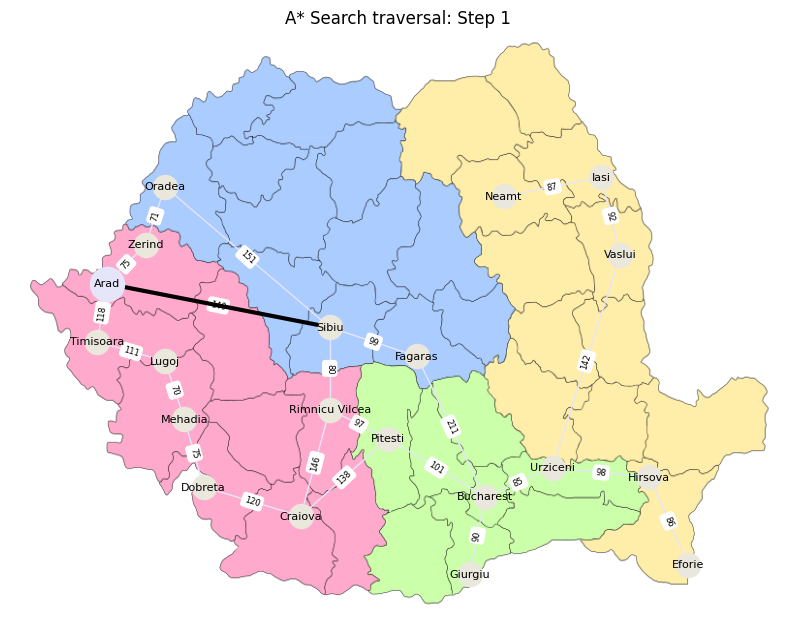

<Figure size 640x480 with 0 Axes>

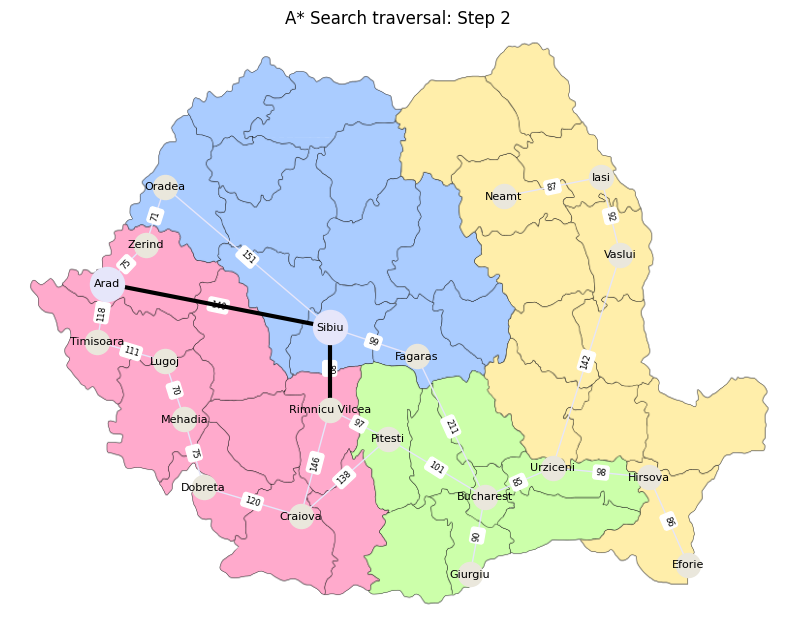

<Figure size 640x480 with 0 Axes>

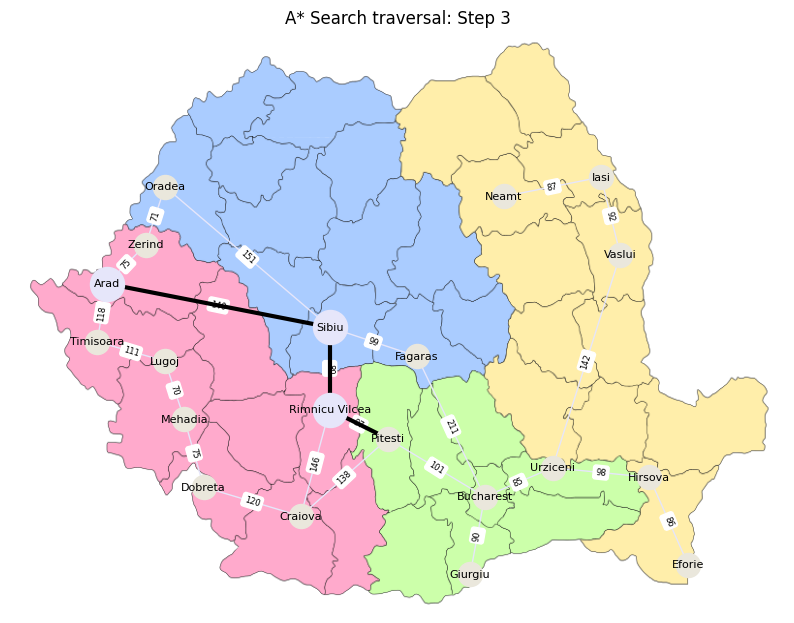

<Figure size 640x480 with 0 Axes>

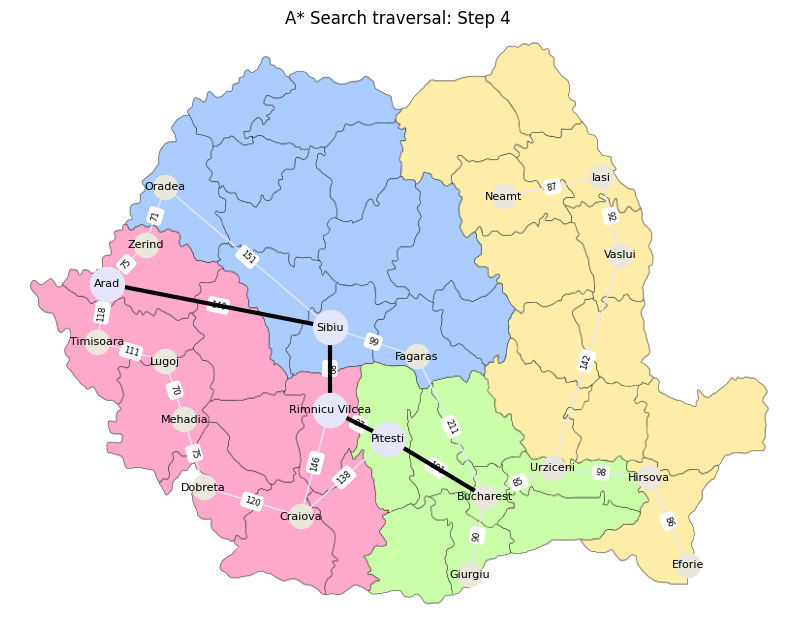

<Figure size 640x480 with 0 Axes>

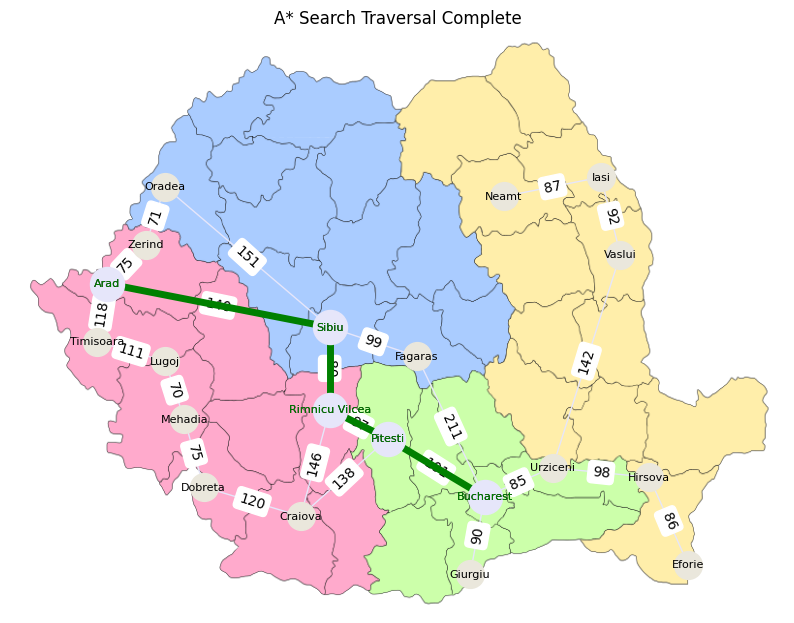

In [172]:
runAlgorithm(A_star, "A* Search")

<div style="background-color: #EDF6F9; padding: 10px; color: #3D4F56; font-family: 'Georgia'; border: 2px solid #8E8D8A;">
    <h2>Project Goal</h2>
    <p>The goal of this project was to create a visual representation of the traversal paths of the algorithms from our unit on Informed Search. This would allow me to explore libraries such as Matplotlib, Networkx, and Pillow in order to develop a visualization for these algorithms. As a visual learner myself, I believe it is important to be able to create visualizations of your algorithms in order to better analyze and understand their output. Through this project, I learned to both format a Jupyter Notebook project and expanded my knowledge on popular graphical libraries. Both of these are important, as I plan to go into data analytics, so I will need skills in both of these areas. Below, I provide a bit more detail on my findings from my two main areas of focus.
</p>
    <h3>Formatting a Jupyter Notebook</h3>
    <p>Prior to this course, I had not used Jupyter Notebook, so I was unfamiliar with some of its features. I discovered that Jupyter Notebook supports two types of cells: Markdown cells and Code cells. Markdown cells allow for both Markdown language and HTML to create a more visually appealing interface. Luckily, I had previous experience using HTML, so I was able to utilize that in formatting my project.
</p>
    <h3>Python Graphical Libraries</h3>
    <p>This project allowed me to explore some of python's graphical libraries, which are powerful tools used to display data. I used this project as an opportunity to familiarize myself with some of the visualization features from Matplotlib and Networkx. Knowing how to display data in this type of way is a very valuable skill for my future, as I plan to work in data analytics.
    <h2>Honors Justification</h2>
    <p>I believe that this project is considered honors level work because it goes above and beyond the regular coursework. My project allows for a more in depth analysis and understanding of the search algorithms discussed in class. My incorporation of features from python's graphical libraries and HTML formatting allowed me to exceed the standard expectations for this unit.
</div>


<div style="padding: 10px; color: #3D4F56; font-family: 'Georgia';">
    <h3><i>Works Cited (links):</i></h3>
    <p><a href="https://medium.com/analytics-vidhya/the-ultimate-markdown-guide-for-jupyter-notebook-d5e5abf728fd" style="color: blue; text-decoration: none;">Jupyter Notebook Formatting</a></p>
        <p><a href="https://networkx.org/documentation/stable/reference/index.html" style="color: blue; text-decoration: none;">NetworkX</a></p>
     <p><a href="https://matplotlib.org/" style="color: blue; text-decoration: none;">Matplotlib</a></p>
     <p><a href="https://pillow.readthedocs.io/en/stable/reference/Image.html" style="color: blue; text-decoration: none;">Pillow (Import Image)</a></p>
        <p><a href="https://en.m.wikipedia.org/wiki/File:Romania_NUTS_1.svg" style="color: blue; text-decoration: none;">Map of Romania Image</a></p>
</div>